In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading each file from the dataset and putting them in a dictionary
df1= pd.read_csv(r"C:\Users\khuma\startups\funds.csv")
df2 = pd.read_csv(r"C:\Users\khuma\startups\funding_rounds.csv")
df3 = pd.read_csv(r"C:\Users\khuma\startups\acquisitions.csv")
df4= pd.read_csv(r"C:\Users\khuma\startups\degrees.csv")
df5 = pd.read_csv(r"C:\Users\khuma\startups\investments.csv")
df6 = pd.read_csv(r"C:\Users\khuma\startups\ipos.csv")
df7 = pd.read_csv(r"C:\Users\khuma\startups\milestones.csv")
df8 = pd.read_csv(r"C:\Users\khuma\startups\offices.csv")
df9 = pd.read_csv(r"C:\Users\khuma\startups\objects.csv")
df10 = pd.read_csv(r"C:\Users\khuma\startups\people.csv")
df11 = pd.read_csv(r"C:\Users\khuma\startups\relationships.csv")

datasets = {
    "funds": df1,
    "funding_rounds": df2,
    "acquisitions": df3,
    "degrees": df4,
    "investments": df5,
    "ipos": df6,
    "milestones": df7,
    "offices": df8,
    "objects": df9,
    "people": df10,
    "relationships": df11,
}

for name, data in datasets.items():
    print(f"📊 Dataset: {name}")
    print(data.info())  # Check column types, missing values
    print(data.head())  # Display first few rows
    print("=" * 50)

C:\Users\khuma\AppData\Local\Temp\ipykernel_11028\3891508508.py:10: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df9 = pd.read_csv(r"C:\Users\khuma\startups\objects.csv")


📊 Dataset: funds
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1564 non-null   int64  
 1   fund_id               1564 non-null   int64  
 2   object_id             1564 non-null   object 
 3   name                  1564 non-null   object 
 4   funded_at             1449 non-null   object 
 5   raised_amount         1564 non-null   float64
 6   raised_currency_code  1564 non-null   object 
 7   source_url            1272 non-null   object 
 8   source_description    1218 non-null   object 
 9   created_at            1564 non-null   object 
 10  updated_at            1564 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 134.5+ KB
None
   id  fund_id object_id                        name   funded_at  \
0   1        1     f:371                 Second Fund  2008-12-16   
1   4   

In [3]:
# ✅ Identify missing values
missing_values = {name: df.isnull().sum().sum() for name, df in datasets.items()}
print("📌 Missing Values in Each Dataset:", missing_values)

📌 Missing Values in Each Dataset: {'funds': 753, 'funding_rounds': 78511, 'acquisitions': 9658, 'degrees': 91144, 'investments': 0, 'ipos': 3314, 'milestones': 18243, 'offices': 431467, 'objects': 7917475, 'people': 198663, 'relationships': 511067}


In [4]:
# ✅ Drop columns with more than 50% missing values
for name, df in datasets.items():
    threshold = 0.5 * len(df)
    datasets[name] = df.dropna(axis=1, thresh=threshold)
    print(f"🗑️ Dropped high-missing columns in {name}")

🗑️ Dropped high-missing columns in funds
🗑️ Dropped high-missing columns in funding_rounds
🗑️ Dropped high-missing columns in acquisitions
🗑️ Dropped high-missing columns in degrees
🗑️ Dropped high-missing columns in investments
🗑️ Dropped high-missing columns in ipos
🗑️ Dropped high-missing columns in milestones
🗑️ Dropped high-missing columns in offices
🗑️ Dropped high-missing columns in objects
🗑️ Dropped high-missing columns in people
🗑️ Dropped high-missing columns in relationships


In [5]:
for name, data in datasets.items():
    data.fillna("Unknown", inplace=True)

C:\Users\khuma\AppData\Local\Temp\ipykernel_11028\665327574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna("Unknown", inplace=True)


In [6]:
for name, df in datasets.items():
    for col in df.columns:
        if df[col].dtype == "number":
            df[col].fillna(df[col].median(), inplace=True)  # Replace NaNs with median
        else:
            df[col].fillna("Unknown", inplace=True)  # Replace missing categories
    print(f"✅ Missing values handled in {name}")

C:\Users\khuma\AppData\Local\Temp\ipykernel_11028\2748118089.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)  # Replace missing categories
C:\Users\khuma\AppData\Local\Temp\ipykernel_11028\2748118089.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna("Unknown", inplace=True)  # Replac

✅ Missing values handled in funds
✅ Missing values handled in funding_rounds
✅ Missing values handled in acquisitions
✅ Missing values handled in degrees
✅ Missing values handled in investments
✅ Missing values handled in ipos
✅ Missing values handled in milestones
✅ Missing values handled in offices
✅ Missing values handled in objects
✅ Missing values handled in people
✅ Missing values handled in relationships


In [7]:
# ✅ Drop rows where key financial data is missing
datasets["funding_rounds"].dropna(subset=["raised_amount_usd"], inplace=True)
datasets["acquisitions"].dropna(subset=["price_amount"], inplace=True)
datasets["investments"].dropna(subset=["funded_object_id"], inplace=True)

print("📌 Dropped rows with critical missing financial data.")


📌 Dropped rows with critical missing financial data.


C:\Users\khuma\AppData\Local\Temp\ipykernel_11028\3822653522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets["acquisitions"].dropna(subset=["price_amount"], inplace=True)


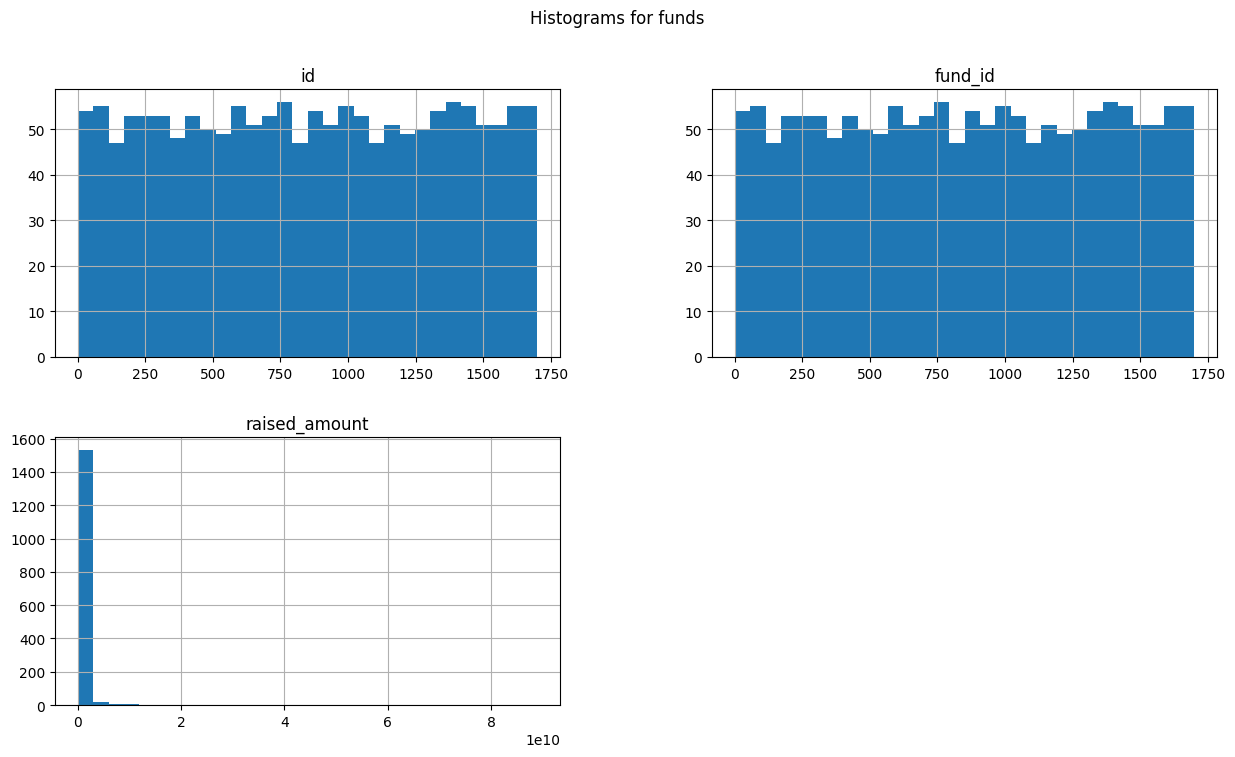

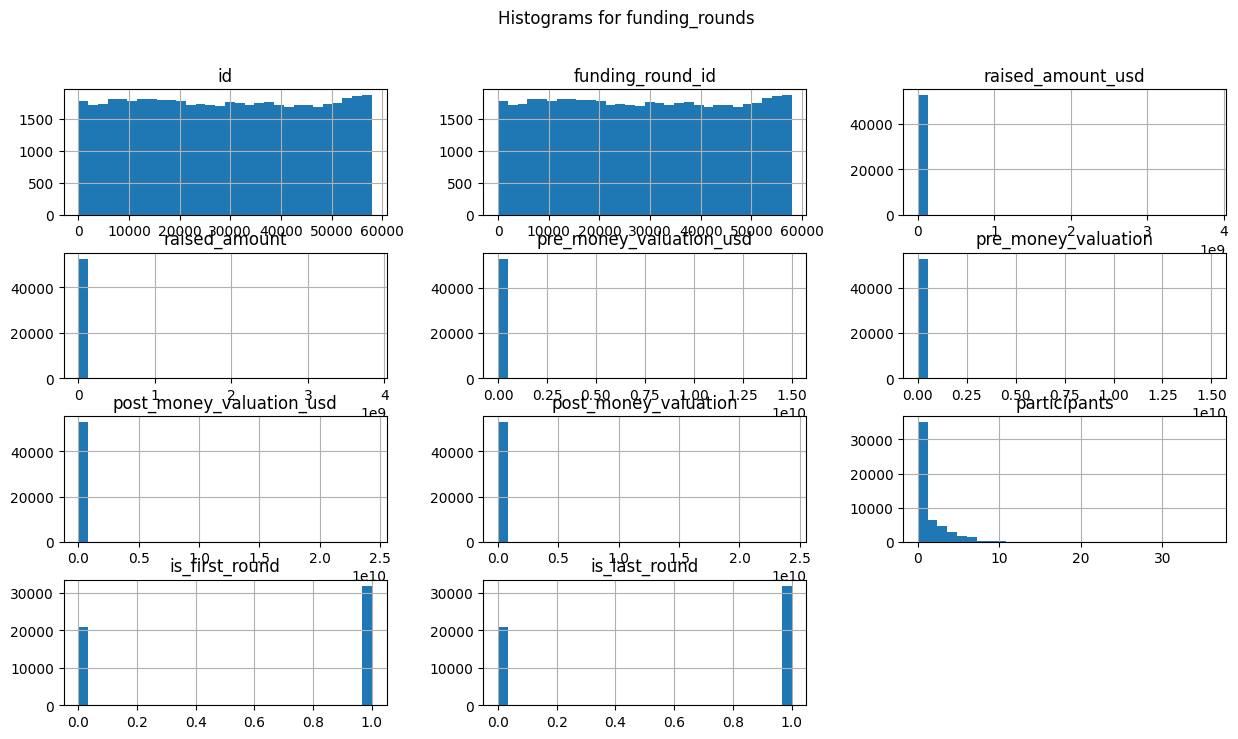

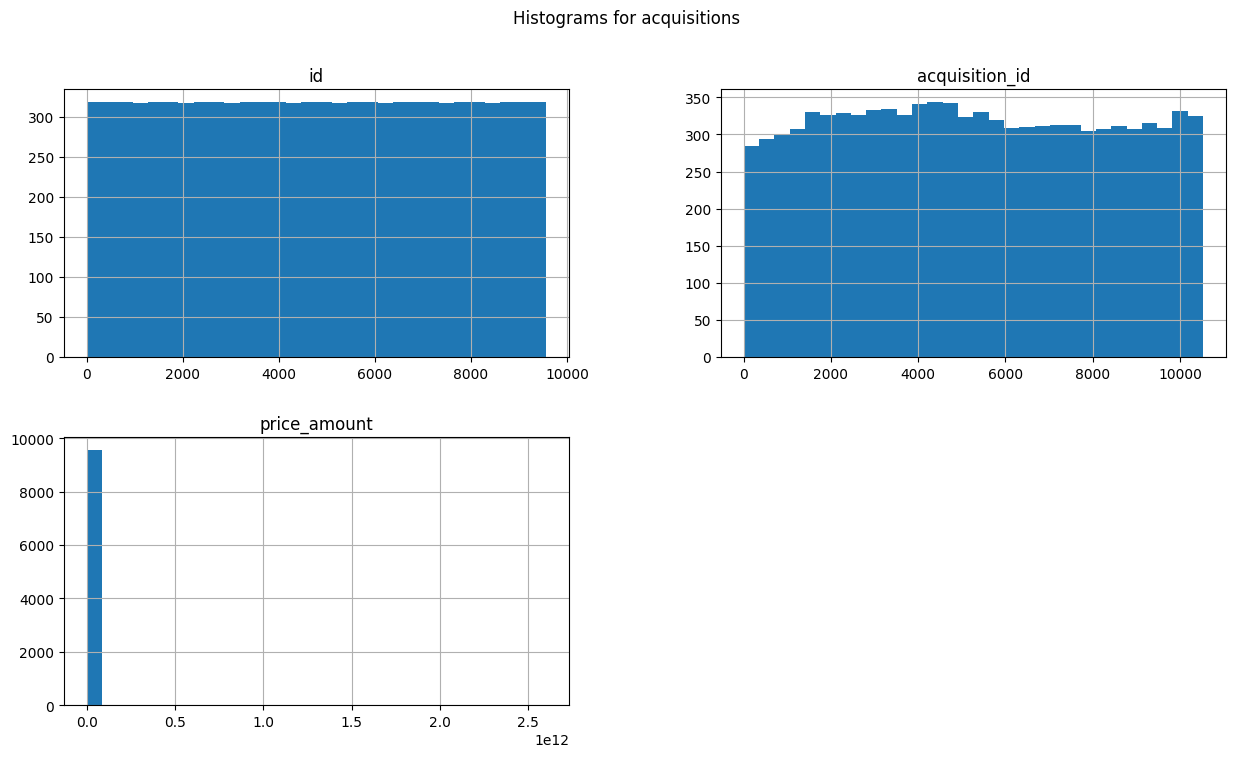

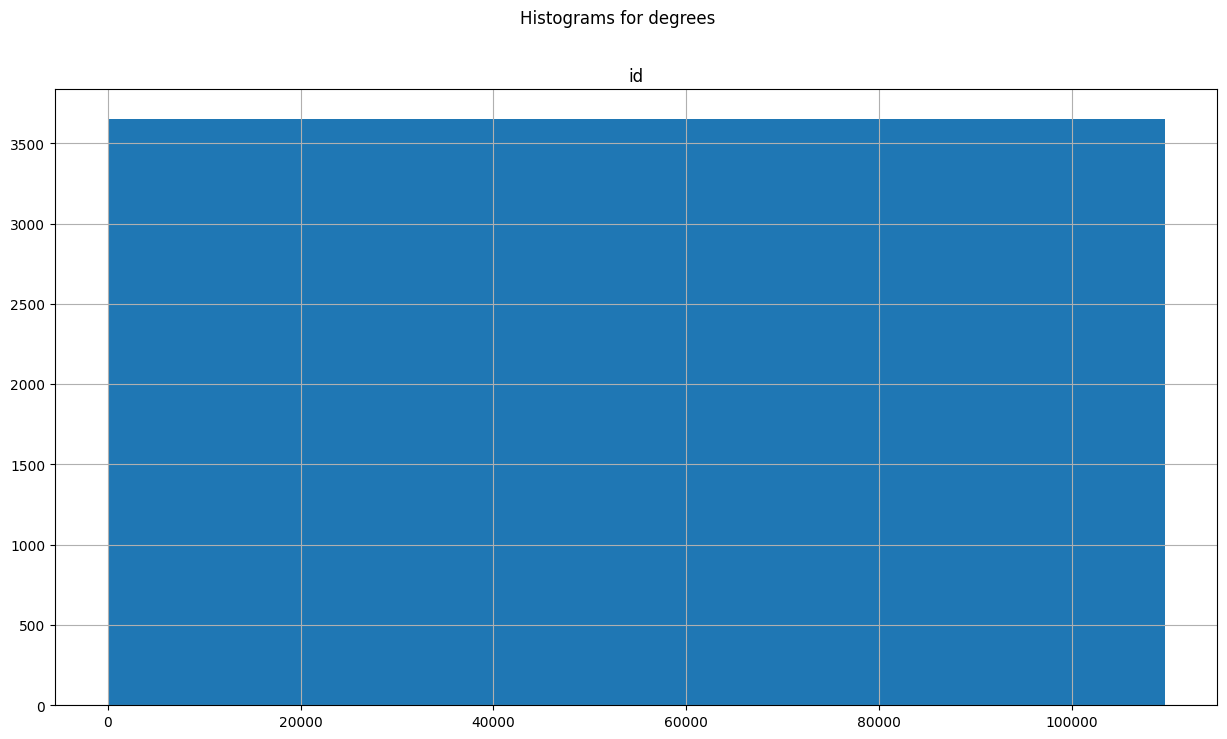

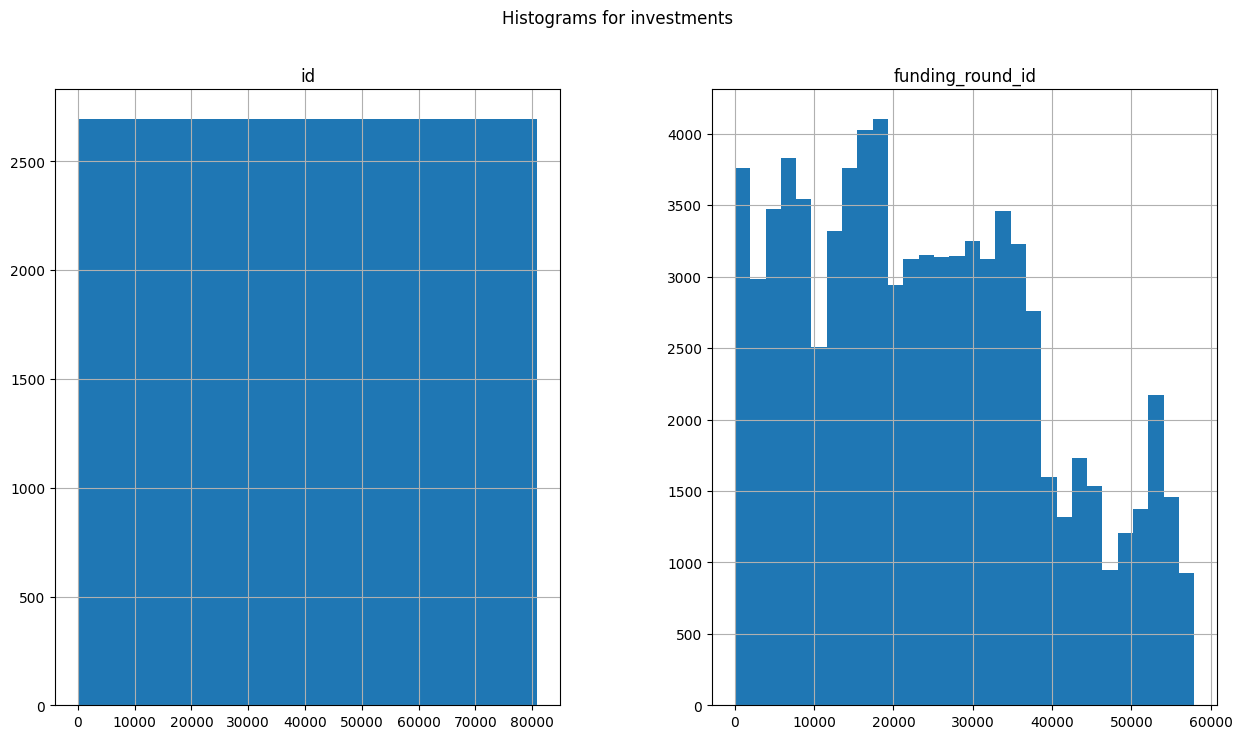

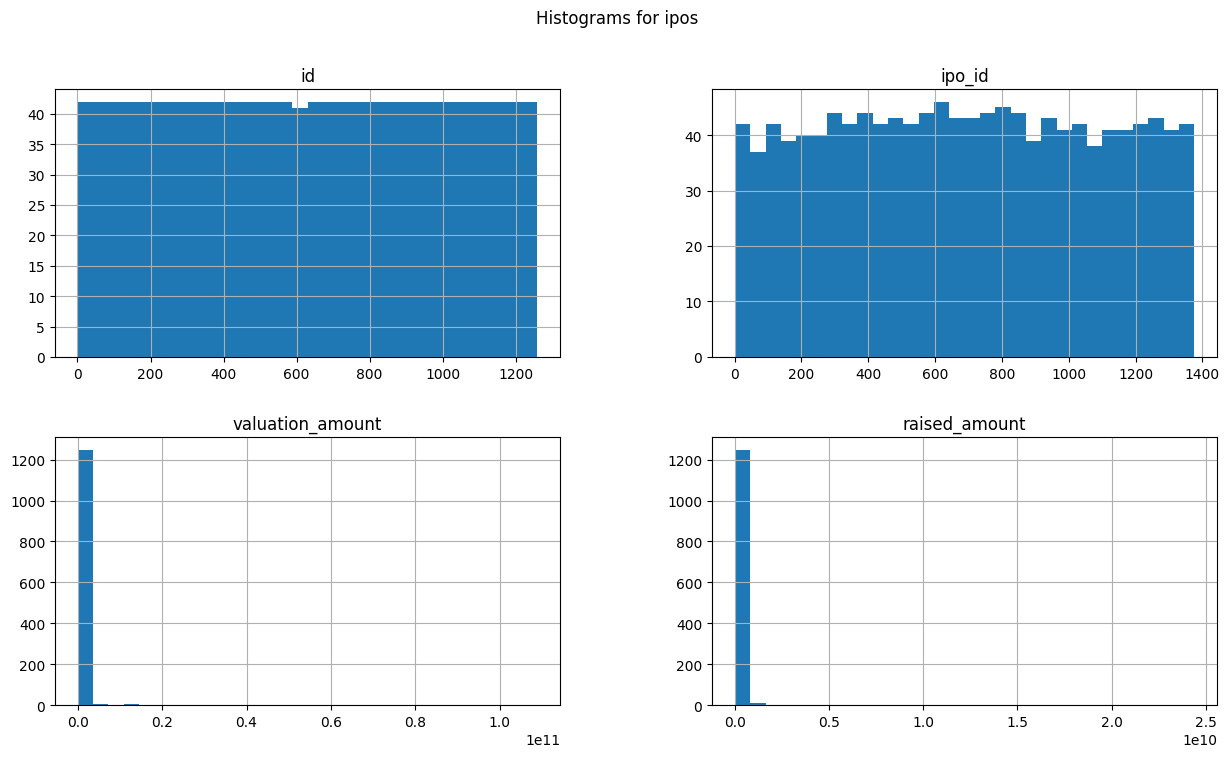

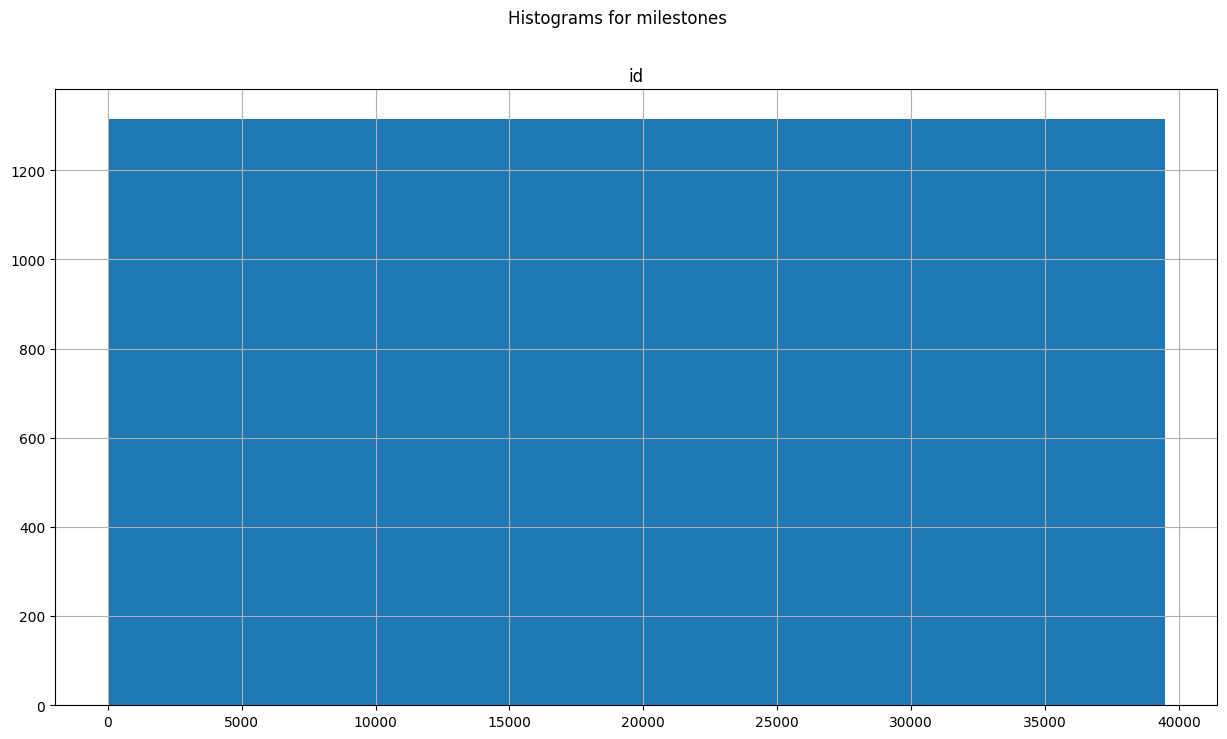

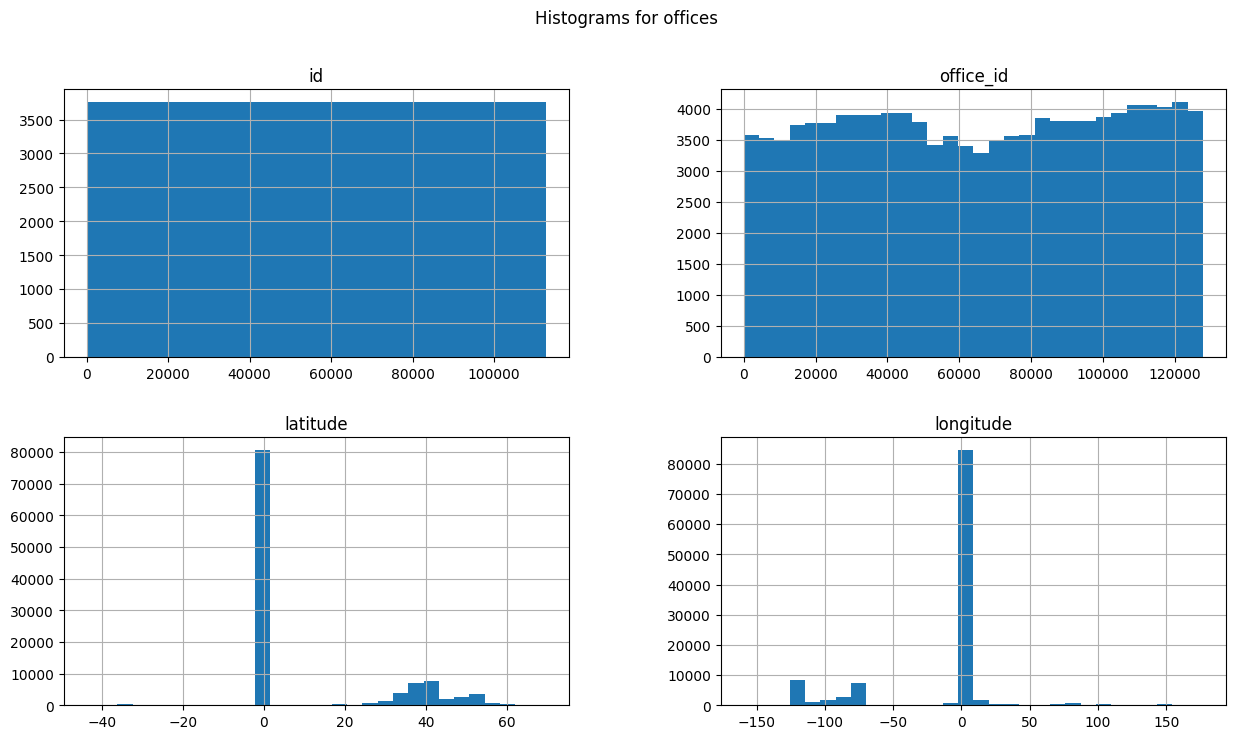

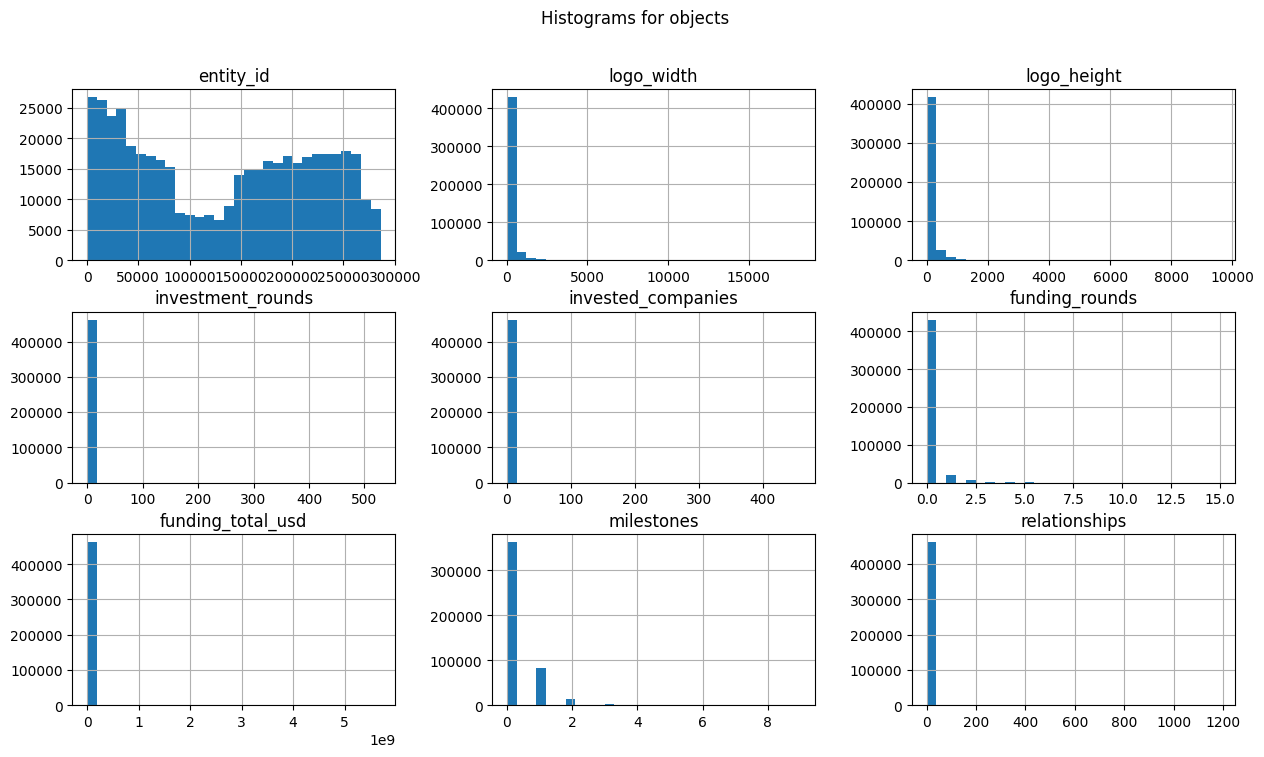

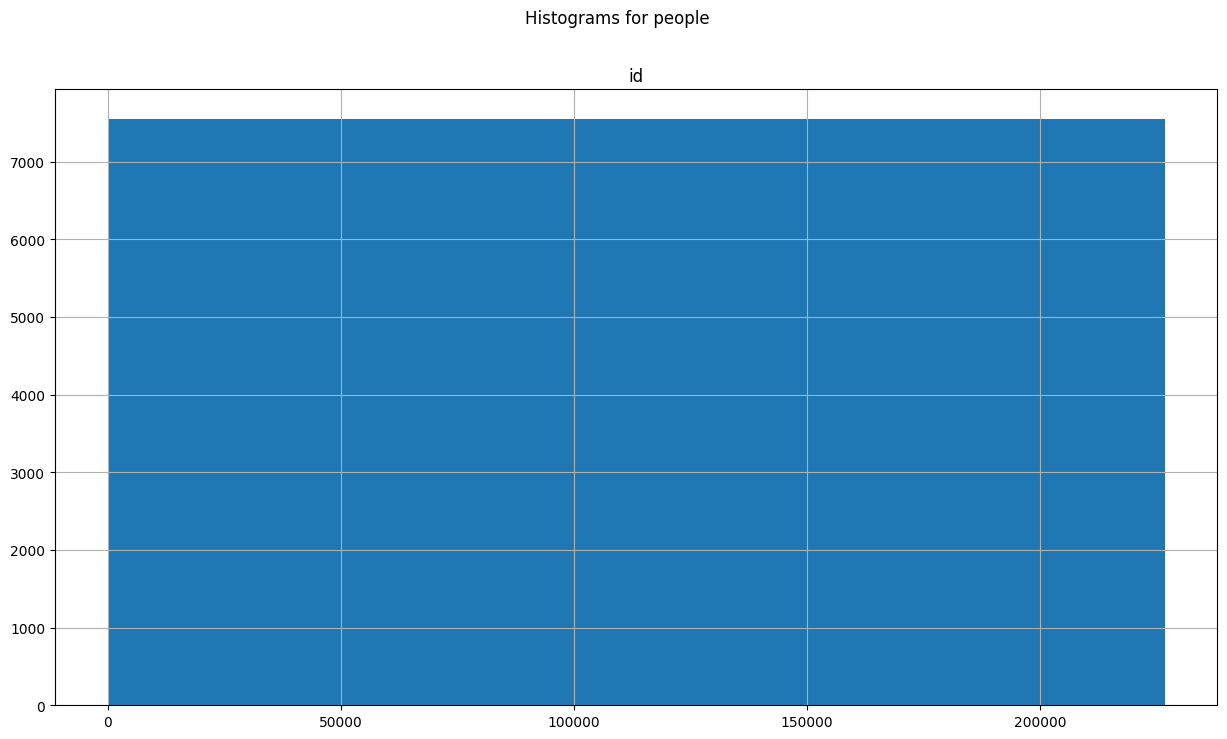

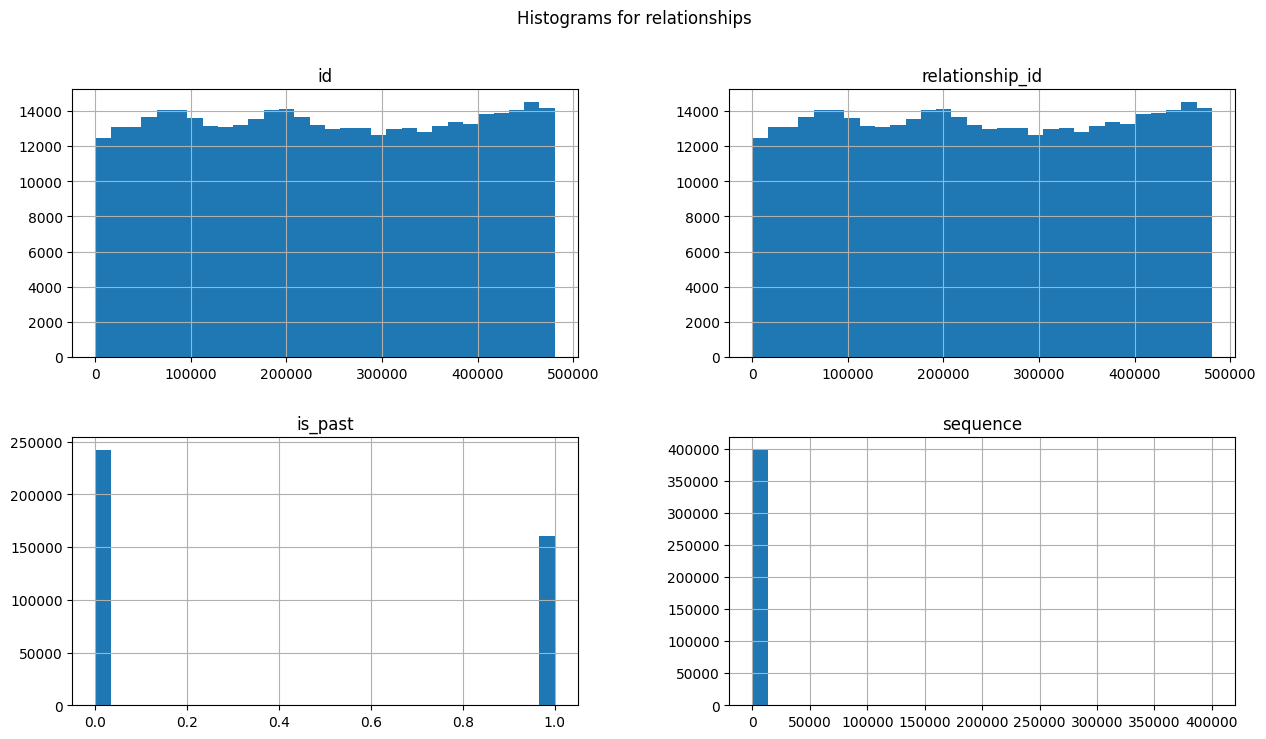

In [8]:
for name, data in datasets.items():
    numeric_cols = data.select_dtypes(include=['number']).columns
    if len(numeric_cols) > 0:
        data[numeric_cols].hist(figsize=(15, 8), bins=30)
        plt.suptitle(f"Histograms for {name}")
        plt.show()


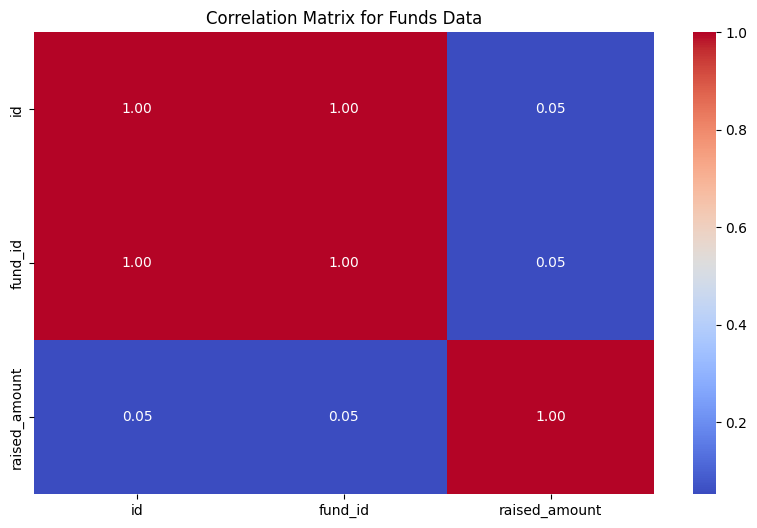

In [9]:
# Select only numeric columns
numeric_df = df1.select_dtypes(include=["number"])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Funds Data")
plt.show()


In [10]:
#finding top invest

top_investors = df5["investor_object_id"].value_counts().head(10)
print(top_investors)


investor_object_id
f:367     529
f:316     515
f:17      507
f:3181    484
f:4       480
f:41      478
c:2520    478
f:26      462
f:5928    364
f:29      361
Name: count, dtype: int64


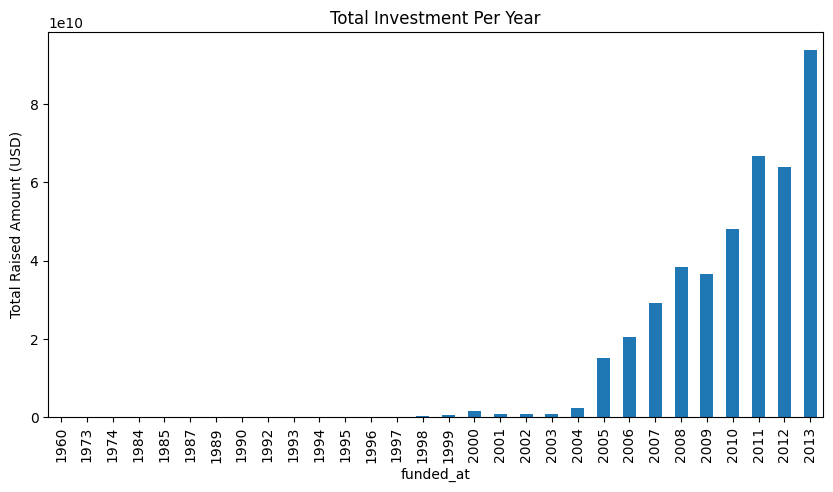

In [11]:
df2["funded_at"] = pd.to_datetime(df2["funded_at"], errors="coerce")

df2 = df2.dropna(subset=["funded_at"])

df2.groupby(df2["funded_at"].dt.year)["raised_amount_usd"].sum().plot(kind="bar", figsize=(10,5))
plt.title("Total Investment Per Year")
plt.ylabel("Total Raised Amount (USD)")
plt.show()


In [12]:
#Top startups acquired

top_acquired = df3["acquired_object_id"].value_counts().head(10)
print(top_acquired)


acquired_object_id
c:596      5
c:26851    5
c:67955    4
c:76479    3
c:22827    3
c:1384     3
c:66494    3
c:4770     3
c:44881    3
c:44268    3
Name: count, dtype: int64


C:\Users\khuma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\khuma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


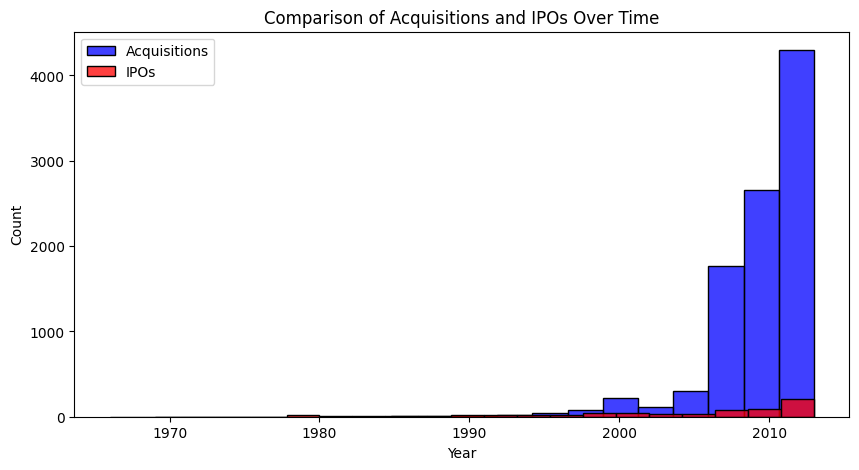

In [13]:
# Replace 'Unknown' or other invalid values with NaN
df6["public_at"] = pd.to_datetime(df6["public_at"], errors="coerce")
df6["Year"] = df6["public_at"].dt.year

df3["acquired_at"] = pd.to_datetime(df3["acquired_at"], errors="coerce")
df3["Year"] = df3["acquired_at"].dt.year

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df3["Year"].dropna(), color="blue", label="Acquisitions", bins=20)
sns.histplot(df6["Year"].dropna(), color="red", label="IPOs", bins=20)

plt.legend()
plt.title("Comparison of Acquisitions and IPOs Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


In [14]:
import sqlite3

# ✅ Create SQLite database
conn = sqlite3.connect("startups.db")

# ✅ Save datasets to SQLite
for name, df in datasets.items():
    df.to_sql(name, conn, if_exists="replace", index=False)

print("✅ All datasets loaded into SQLite!")


✅ All datasets loaded into SQLite!


In [40]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

model_name = "Salesforce/codet5-small"
sql_generator = pipeline("text2text-generation", model=model_name, tokenizer=model_name, framework="pt")

Error during conversion: ChunkedEncodingError(ProtocolError("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read)))


In [28]:
print("🛠 DEBUG: Loading model...")

try:
    tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name, trust_remote_code=True)
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"⚠️ Model loading failed: {e}")

🛠 DEBUG: Loading model...
✅ Model loaded successfully!


In [29]:
test_input = "Translate this into a simple English sentence: The sky is blue."
inputs = tokenizer(test_input, return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=50)

print("🛠 DEBUG: Model Output:", tokenizer.decode(output[0], skip_special_tokens=True))


🛠 DEBUG: Model Output:  def translate_to_en_sentence ( )


Error during conversion: ChunkedEncodingError(ProtocolError("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read)))


In [38]:
def generate_sql(natural_query):
    input_text = f"Generate a SQL query for: {natural_query}"  
    inputs = tokenizer(input_text, return_tensors="pt")
    output = model.generate(**inputs, max_new_tokens=200)  

    sql_query = tokenizer.decode(output[0], skip_special_tokens=True)
    
    print(f"🛠 DEBUG: Raw Model Output -> {sql_query}")  

    if not sql_query.lower().startswith("select"):
        return "⚠️ Model failed to generate a valid SQL query."

    return sql_query


In [31]:
def execute_sql(query):
    """ Run the generated SQL query on the database """
    if not query or "⚠️" in query:
        return "⚠️ Invalid SQL query generated."

    try:
        result = pd.read_sql(query, conn)
        return result
    except Exception as e:
        return f"⚠️ SQL Error: {str(e)}"


In [32]:
test_queries = [
    "What are the most valuable startup acquisitions?",
    "List the top 5 startups with the highest funding.",
    "Show all startups founded in 2020."
]

for query in test_queries:
    print("💡 Natural Query:", query)
    print("📝 Generated SQL:", generate_sql(query))
    print("=" * 50)


💡 Natural Query: What are the most valuable startup acquisitions?
🛠 DEBUG: Raw Model Output ->  def
📝 Generated SQL: ⚠️ Model failed to generate a valid SQL query.
💡 Natural Query: List the top 5 startups with the highest funding.
🛠 DEBUG: Raw Model Output -> .
📝 Generated SQL: ⚠️ Model failed to generate a valid SQL query.
💡 Natural Query: Show all startups founded in 2020.
🛠 DEBUG: Raw Model Output -> .
📝 Generated SQL: ⚠️ Model failed to generate a valid SQL query.


In [33]:
while True:
    user_query = input("💡 Ask a startup-related business question (or type 'exit'): ")
    
    if user_query.lower() == "exit":
        print("👋 Exiting SQL Generator. Goodbye!")
        break

    # Convert to SQL
    sql_query = generate_sql(user_query)
    print(f"📝 Generated SQL Query: {sql_query}")

    # Execute SQL
    result = execute_sql(sql_query)
    print("📊 Query Result:\n", result)


💡 Ask a startup-related business question (or type 'exit'):  What are the most valuable startup acquisitions?


🛠 DEBUG: Raw Model Output ->  def
📝 Generated SQL Query: ⚠️ Model failed to generate a valid SQL query.
📊 Query Result:
 ⚠️ Invalid SQL query generated.


💡 Ask a startup-related business question (or type 'exit'):  exit


👋 Exiting SQL Generator. Goodbye!


In [50]:
import pandas as pd
import sqlite3

# Step 1: Create Dummy Data (Simulating CSV Data)
data = {
    "startups": pd.DataFrame({
        "id": [1, 2, 3, 4, 5],
        "name": ["FinTechX", "HealthAI", "EduNext", "RoboTech", "AIStart"],
        "industry": ["Fintech", "HealthTech", "EdTech", "AI", "AI"],
        "total_funding": [5000000, 12000000, 7000000, 15000000, 18000000],
        "funding_rounds": [3, 5, 4, 6, 7],
        "status": ["Active", "Acquired", "Active", "IPO", "Active"],
        "country": ["USA", "UK", "India", "Germany", "USA"]
    }),
    
    "funding_rounds": pd.DataFrame({
        "company_name": ["FinTechX", "HealthAI", "EduNext", "RoboTech", "AIStart"],
        "round": ["Series A", "Series B", "Series A", "Series C", "Series D"],
        "amount_raised": [2000000, 5000000, 3000000, 7000000, 10000000],
        "investor": ["VC Firm A", "VC Firm B", "Angel Investor", "VC Firm C", "VC Firm D"]
    })
}

# Step 2: Load Data into In-Memory SQLite Database
conn = sqlite3.connect(":memory:")
for table_name, df in data.items():
    df.to_sql(table_name, conn, index=False, if_exists="replace")

# Step 3: SQL Query Generator (Rule-Based)
def generate_sql(user_query):
    """Generates an SQL query based on a simple rule-based approach."""
    user_query = user_query.lower()
    
    if "top" in user_query and "funding" in user_query:
        return "SELECT name, total_funding FROM startups ORDER BY total_funding DESC LIMIT 5;"
    
    elif "fintech" in user_query:
        return "SELECT name FROM startups WHERE industry='Fintech';"
    
    elif "healthtech" in user_query and "funding" in user_query:
        return "SELECT SUM(total_funding) FROM startups WHERE industry='HealthTech';"
    
    elif "top countries" in user_query or "most funded countries" in user_query:
        return "SELECT country, SUM(total_funding) as total FROM startups GROUP BY country ORDER BY total DESC LIMIT 3;"
    
    elif "funding rounds for" in user_query:
        company_name = user_query.split("for")[-1].strip().title()
        return f"SELECT * FROM funding_rounds WHERE company_name='{company_name}';"
    
    else:
        return "Error: No matching SQL query found."

# Step 4: Execute SQL Query
def execute_sql(sql_query):
    """Executes the generated SQL query and returns results."""
    try:
        return pd.read_sql_query(sql_query, conn)
    except Exception as e:
        return f"SQL Execution Error: {str(e)}"

# Step 5: User Input Simulation
user_input = "Find top 5 AI startups with the highest funding"
sql_query = generate_sql(user_input)

print("Generated SQL Query:\n", sql_query)

# Step 6: Run SQL Query if Valid
if "Error" not in sql_query:
    results = execute_sql(sql_query)
    print(results)
else:
    print("SQL Generation Failed.")

Generated SQL Query:
 SELECT name, total_funding FROM startups ORDER BY total_funding DESC LIMIT 5;
       name  total_funding
0   AIStart       18000000
1  RoboTech       15000000
2  HealthAI       12000000
3   EduNext        7000000
4  FinTechX        5000000
